In [5]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neural_exploration import *
sns.set()

ModuleNotFoundError: No module named 'torch'

### Bandit settings

In [ ]:
T = int(5e2)
n_arms = 4
n_features = 8
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 2

SEED = 42
np.random.seed(SEED)

### Neural network settings

In [ ]:
p = 0.2
hidden_size = 32
epochs = 100
train_every = 10
use_cuda = False

### NeuralUCB on linear rewards

In [ ]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
reward_func = lambda x: 10*np.dot(a, x)

In [ ]:
bandit = ContextualBandit(T, n_arms, n_features, reward_func, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)

### Sublinear regret growth : the bandit problem is solved efficiently

In [ ]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('figures/neural_ucb_linear.pdf')

### NeuralUCB on quadratic rewards

In [ ]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
reward_func = lambda x: 100*np.dot(a, x)**2

In [ ]:
bandit = ContextualBandit(T, n_arms, n_features, reward_func, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda,
                     )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

### Sublinear regret growth : the bandit problem is solved efficiently (even though the reward is nonlinear!)

In [ ]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('figures/neural_ucb_quad.pdf')

### NeuralUCB on nonlinear rewards

In [ ]:
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
reward_func = lambda x: np.cos(2*np.pi*np.dot(x, a))

In [ ]:
bandit = ContextualBandit(T, n_arms, n_features, reward_func, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda,
                     )
    model.run()
    regrets[i] = np.cumsum(model.regrets)

### Sublinear regret growth : the bandit problem is solved efficiently (even though the reward is nonlinear!)

NameError: name 'T' is not defined

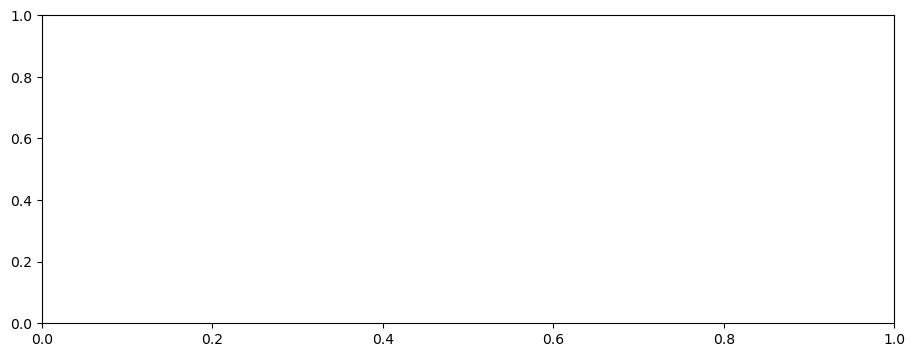

In [4]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('figures/neural_ucb_cosine.pdf')